In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from sklearn.preprocessing import StandardScaler
from models.single_layer_perceptron import SingleLayerPerceptron

In [2]:
ticker = 'B3SA3.SA'
prices = yf.Ticker(ticker).history('max')
prices = prices.drop(['Volume', 'Dividends', 'Stock Splits'], 1)
prices.head()

<ipython-input-2-fde6207d9880>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  prices = prices.drop(['Volume', 'Dividends', 'Stock Splits'], 1)


,Open,High,Low,Close
Date,,,,
2007-10-26,19.503831,21.533450,17.681442,21.326221
2007-10-29,21.088519,21.088519,19.503834,19.503834
2007-10-30,19.503834,19.656208,18.900435,18.985764
2007-10-31,19.211276,20.113328,19.192991,19.808580
2007-11-01,19.869531,20.101140,19.272227,20.076759


In [3]:
y = prices.Close.shift(-5)
prices['y'] = y

In [4]:
prices.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [5]:
prices['SMA_5'] = prices.ta.sma(5)
prices['SMA_30'] = prices.ta.sma(30)
prices['SMA_60'] = prices.ta.sma(60)
prices['RSI_5'] = prices.ta.rsi(5)
prices['RSI_30'] = prices.ta.rsi(30)
prices['RSI_60'] = prices.ta.rsi(60)
prices = pd.concat([prices, ta.donchian(prices["High"], prices["Low"], lower_length=10, upper_length=15)], 1)
prices =  prices.dropna()

columns = list(prices.columns)
columns.remove('y')
prices_scaled = pd.DataFrame(StandardScaler().fit_transform(prices[columns]), columns=columns, index = prices.index)
prices_scaled['y'] = prices.y

<ipython-input-5-5d89176a11cc>:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  prices = pd.concat([prices, ta.donchian(prices["High"], prices["Low"], lower_length=10, upper_length=15)], 1)


In [6]:
trading_threshold = '2021-10-31'
prices.index = pd.to_datetime(prices.index)
train_prices = prices[(prices.index <= trading_threshold) & (prices.index.year >= 2016)]
test_prices = prices[prices.index > trading_threshold]

In [7]:
train_X = train_prices.drop('y', 1)
train_y = train_prices.y
test_X = test_prices.drop('y', 1)
test_y = test_prices.y

<ipython-input-7-9edf73517eb2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_X = train_prices.drop('y', 1)
<ipython-input-7-9edf73517eb2>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_X = test_prices.drop('y', 1)


In [8]:
slp = SingleLayerPerceptron(train_X.shape[1], 50, 1, 'sigmoid')
X = train_X.to_numpy()
y = train_y.to_numpy()
slp.train(X, y)
slp.saved_errors[-5:]

Época: 1 Erro: 28.66242014319943
Época: 2 Erro: -21181.815110025767
Época: 3 Erro: 15653573.184460014
Época: 4 Erro: -11568147119.047867
Época: 5 Erro: 8548976402447.567
Época: 6 Erro: -6317779051172774.0
Época: 7 Erro: 4.668901896607229e+18
Época: 8 Erro: -3.45036519061171e+21
Época: 9 Erro: 2.549854379513932e+24
Época: 10 Erro: -1.8843678850045998e+27
Época: 11 Erro: 1.3925667106972393e+30
Época: 12 Erro: -1.0291207248723695e+33
Época: 13 Erro: 7.605305068879258e+35
Época: 14 Erro: -5.620396498952493e+38
Época: 15 Erro: 4.153529216690863e+41
Época: 16 Erro: -3.0694996264266948e+44
Época: 17 Erro: 2.2683909189255857e+47
Época: 18 Erro: -1.6763635729952088e+50
Época: 19 Erro: 1.2388494440791905e+53
Época: 20 Erro: -9.155221276689581e+55
Época: 21 Erro: 6.765800075686347e+58
Época: 22 Erro: -4.9999939139330316e+61
Época: 23 Erro: 3.695045502335686e+64
Época: 24 Erro: -2.73067557668107e+67
Época: 25 Erro: 2.0179965579230826e+70
Época: 26 Erro: -1.491319636270744e+73
Época: 27 Erro: 1.102

c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:50: RuntimeWarning: overflow encountered in matmul
  Eh = np.multiply(self.get_act_func_gradient(self.A1), (loss @ self.output_weights.T))
c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:50: RuntimeWarning: invalid value encountered in multiply
  Eh = np.multiply(self.get_act_func_gradient(self.A1), (loss @ self.output_weights.T))


[-5.7342804565813336e+147,
 4.237690600218181e+150,
 -3.1316957304672087e+153,
 2.314354461772597e+156,
 nan]

In [15]:
size = train_X.shape[1]
slp = SingleLayerPerceptron(train_X.shape[1], 50, 1, 'identity')
slp.learning_rate = 1e-10

In [16]:
slp.train(train_X.to_numpy(), train_y.to_numpy())
slp.saved_errors[-5:]

Época: 1 Erro: 9809.9183041217
Época: 2 Erro: 4647.230210534652
Época: 3 Erro: 2453.3212564759842
Época: 4 Erro: 1326.3664786213449
Época: 5 Erro: 721.8181955040337
Época: 6 Erro: 393.5400790396604
Época: 7 Erro: 214.6421063291349
Época: 8 Erro: 117.04620429288995
Época: 9 Erro: 63.786751972349656
Época: 10 Erro: 34.71951041162512
Época: 11 Erro: 18.85511098788925
Época: 12 Erro: 10.19652407674378
Época: 13 Erro: 5.470773642874036
Época: 14 Erro: 2.8915248450424937
Época: 15 Erro: 1.4838167572540457
Época: 16 Erro: 0.7155251912151679
Época: 17 Erro: 0.29622159010613985
Época: 18 Erro: 0.06739260411277923
Época: 19 Erro: -0.057476976765547624
Época: 20 Erro: -0.12560640827357208
Época: 21 Erro: -0.1627675547974086
Época: 22 Erro: -0.18302647926695065
Época: 23 Erro: -0.19406031864799145
Época: 24 Erro: -0.2000591888138261
Época: 25 Erro: -0.20331001932210585
Época: 26 Erro: -0.20506099687521084
Época: 27 Erro: -0.20599337117381866
Época: 28 Erro: -0.2064789625255908
Época: 29 Erro: -0.2

[-0.010065722094053667,
 -0.010046381877333555,
 -0.010027044887197897,
 -0.010007711123212084,
 -0.009988380584938604]

In [22]:
from sklearn.metrics import mean_absolute_error

pred_train = slp.predict(train_X)
pred_test = slp.predict(test_X)
mean_absolute_error(test_y, pred_test)

2.239759841028315

<AxesSubplot:xlabel='Date'>

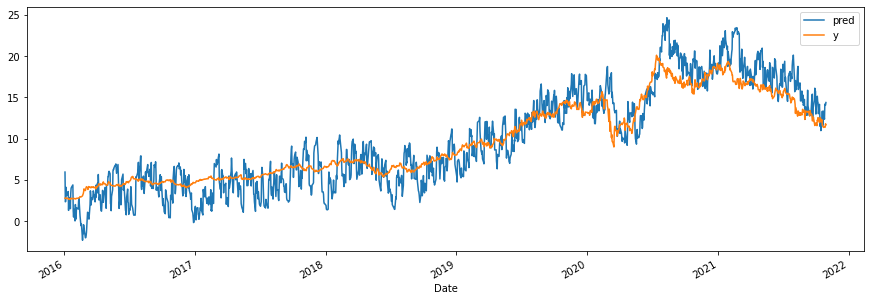

In [23]:
df = pd.DataFrame()
df['pred'] = pred_train
df['y'] = train_y
df.plot(figsize=(15, 5))

<AxesSubplot:xlabel='Date'>

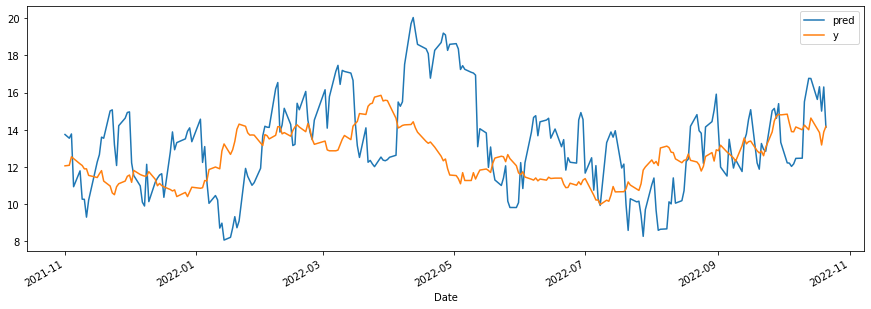

In [25]:
df = pd.DataFrame()
df['pred'] = pred_test
df['y'] = test_y
df.plot(figsize=(15, 5))